This script scrapes tradingeconomics.com to retrieve PMI data from countries around the world. It allows users to aggregate this data with ease, especially for those without a data provider like Bloomberg. A scatter chart at the end is a convenient way to see a snapshot of the current global manufacturing activity. 

In [113]:
from bs4 import BeautifulSoup
import urllib
import pandas as pd

manufacturing_link = "http://www.tradingeconomics.com/country-list/manufacturing-pmi"
composite_link = "http://www.tradingeconomics.com/country-list/composite-pmi"

# This function scrapes the data and puts them into a pandas DataFrame
def PMI(link):
    url = urllib.request.urlopen(link)
    content = url.read()
    data = {}       
    table = BeautifulSoup(content, 'lxml').find("table").find_all("tr")
    for i in range(1,len(table)):
        text = table[i].get_text().replace(" ","").replace("\r", " ").replace("\n", " ").split("\r\n")[0].split()
        data[text[0]] = {"Last": float(text[1]), "Previous": float(text[3]), "Change": float(text[1])-float(text[3]), "Month": text[2]}
    df = pd.DataFrame(data).transpose()
    df.index.name = "Country"
    return (df)

In [114]:
data = PMI(manufacturing_link)
data.head(20)

,Change,Last,Month,Previous
Country,,,,
Australia,3.8,59.8,Aug/17,56
Austria,1.1,61.1,Aug/17,60
Brazil,0.9,50.9,Aug/17,50
Canada,-0.9,54.6,Aug/17,55.5
China,0.5,51.6,Aug/17,51.1
CzechRepublic,-0.4,54.9,Aug/17,55.3
Denmark,-2.6,61.1,Aug/17,63.7
Egypt,0.3,48.9,Aug/17,48.6
EuroArea,0.8,57.4,Aug/17,56.6


In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

def scatter_plot(data):
    # Sort DataFrame in descending PMI
    data = data.sort_values("Last", ascending=False)
    # Keep only these two columns
    data = data[["Last", "Change"]]
    data = data.iloc[:-1,:]

    fig, ax = plt.subplots()
    # Setting minor gridlines at 50 for x axis and 0 for y axis
    ax.set_yticks([0], minor=True)
    ax.yaxis.grid(True, which="minor")
    ax.set_xticks([50], minor=True)
    ax.xaxis.grid(True, which="minor")

    data.plot('Last', 'Change', kind='scatter', figsize=(12,12), ax=ax)

    for Change, Previous in data.iterrows():
        ax.annotate(Change, Previous)

    ax.set_xlabel("Most Recent Manufacturing PMI")
    ax.set_ylabel("Change From Previous Manufacturing PMI")

The scatter chart below paints a picture of the recent manufacturing PMI performance of countries around the world. Concentration of countries in the top right quadrant shows resilient macroeconomic performance globally.

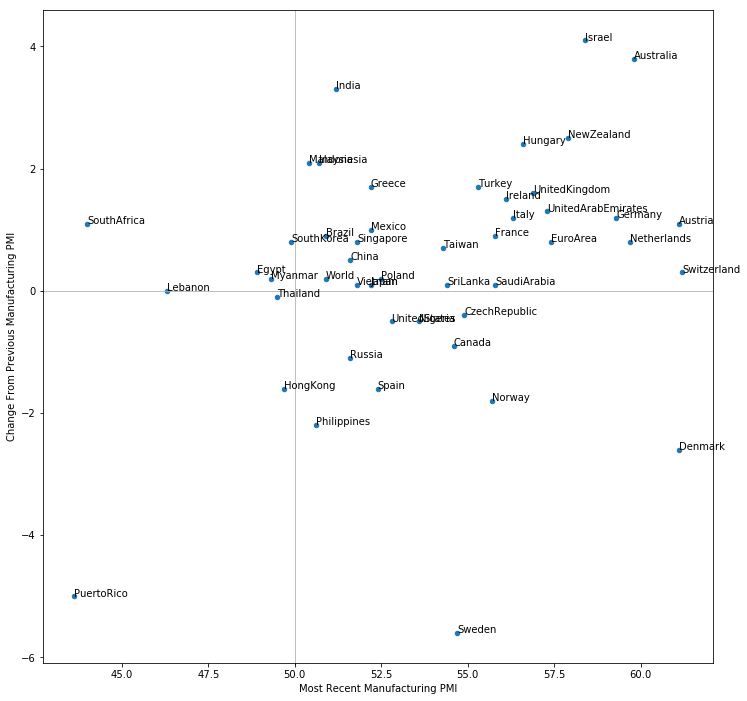

In [116]:
data = PMI(manufacturing_link)
scatter_plot(data)